In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/CIC-IDS2017/


MachineLearningCSV.zip	MachineLearningCVE


In [ ]:
import pandas as pd

# Update this path based on your extracted file location
file_path = "/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                389       113095465                  48   
1                389       113473706                  68   
2                  0       119945515                 150   
3                443        60261928                   9   
4                 53             269                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       24                         9668   
1                       40                        11364   
2                        0                            0   
3                        7                         2330   
4                        2                          102   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         10012                     403   
1                         12718                     403   
2                             0                       0   
3                          4221                 

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 6066


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (164300, 79)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 19


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values are removed
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after removal: {missing_values_after}")


Total missing values after removal: 0


Highly correlated feature pairs (>|0.9| correlation):
(' Flow Duration', 'Fwd IAT Total')
(' Flow Duration', 'Bwd IAT Total')
(' Total Fwd Packets', ' Total Backward Packets')
(' Total Fwd Packets', ' Total Length of Bwd Packets')
(' Total Fwd Packets', ' Fwd Header Length')
(' Total Fwd Packets', ' Bwd Header Length')
(' Total Fwd Packets', ' Fwd Header Length.1')
(' Total Fwd Packets', 'Subflow Fwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Bytes')
(' Total Fwd Packets', ' act_data_pkt_fwd')
(' Total Backward Packets', ' Total Length of Bwd Packets')
(' Total Backward Packets', ' Fwd Header Length')
(' Total Backward Packets', ' Bwd Header Length')
(' Total Backward Packets', ' Fwd Header Length.1')
(' Total Backward Packets', 'Subflow Fwd Packets')
(' Total Backward Packets', ' Subflow Bwd Packets')
(' Total Backward Packets', ' Subflow Bwd Bytes')
(' Total Backward Packets', ' act_data_pkt_fwd')
('Total Length of Fwd Packets', ' Su

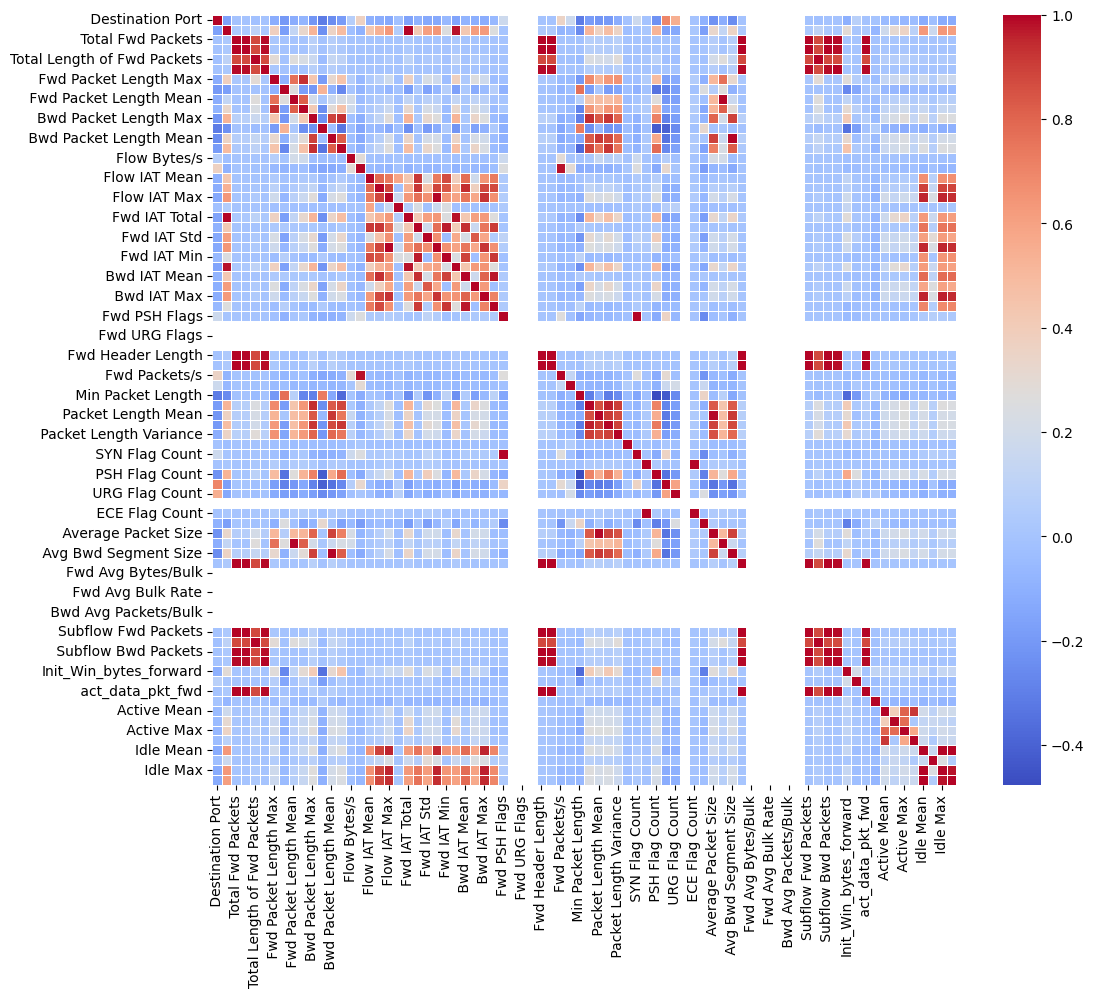

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold (e.g., 0.9)
threshold = 0.9

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated feature pairs (>|0.9| correlation):")
for pair in high_corr_pairs:
    print(pair)

plt.show()


Dropping 31 highly correlated features:
{' act_data_pkt_fwd', ' Active Min', ' Bwd Header Length', ' Subflow Bwd Bytes', 'Fwd Packets/s', ' Subflow Bwd Packets', ' Max Packet Length', ' Bwd IAT Min', ' Avg Bwd Segment Size', ' Fwd IAT Mean', ' Bwd IAT Mean', ' Packet Length Mean', 'Subflow Fwd Packets', ' Bwd IAT Max', 'Bwd IAT Total', ' Fwd Header Length.1', ' Packet Length Std', ' SYN Flag Count', ' Total Backward Packets', ' Total Length of Bwd Packets', ' ECE Flag Count', ' Avg Fwd Segment Size', 'Fwd IAT Total', ' Idle Min', ' Fwd IAT Max', ' Fwd Packet Length Std', ' Idle Max', ' Subflow Fwd Bytes', ' Fwd Header Length', 'Idle Mean', ' Bwd Packet Length Std'}


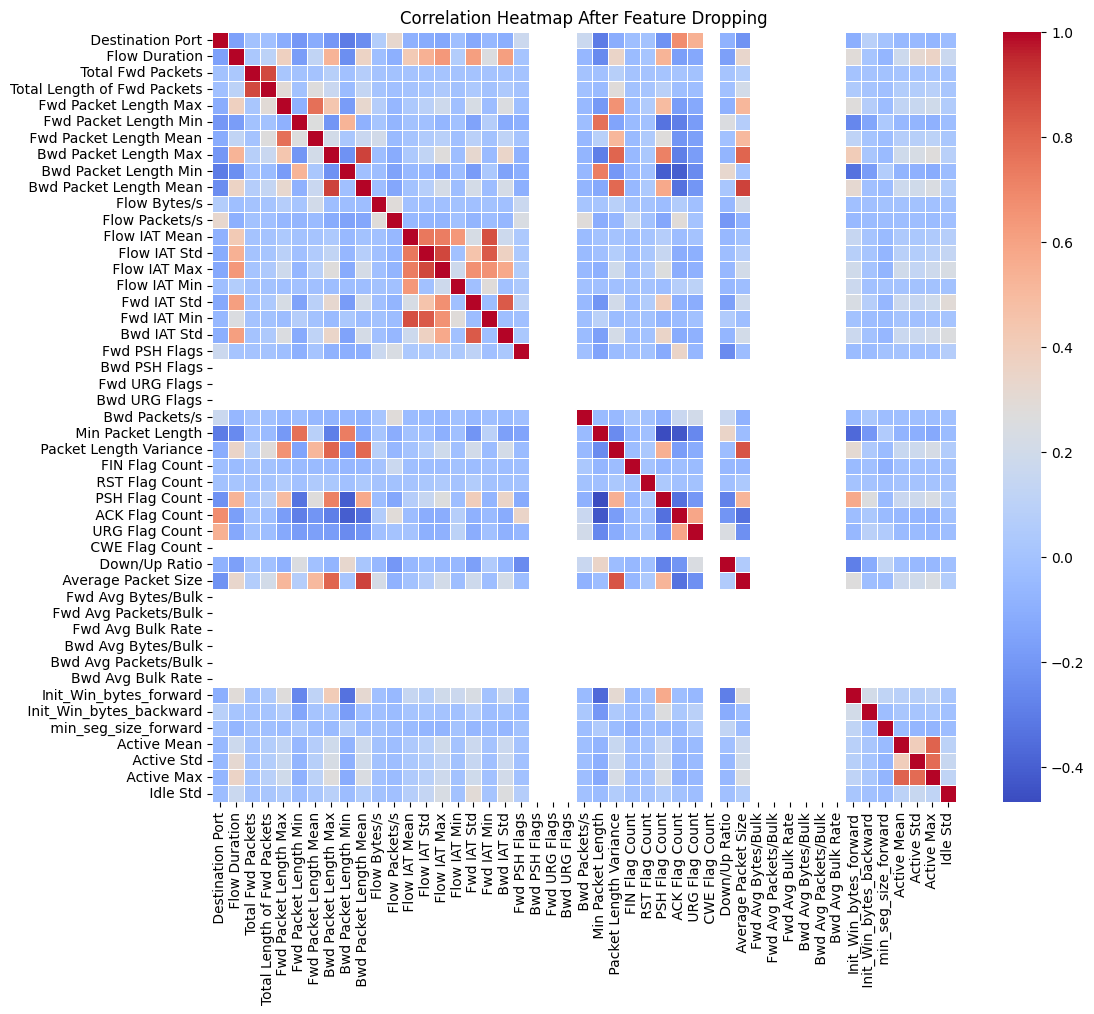

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure you use the cleaned dataset)
df = pd.read_csv("/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")  # Change to your actual dataset

# Select numerical columns only
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Set a correlation threshold
threshold = 0.9

# Find highly correlated feature pairs
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Automatically select features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop one of the correlated features

print(f"Dropping {len(features_to_drop)} highly correlated features:")
print(features_to_drop)

# Drop the selected features
df_cleaned = df.drop(columns=features_to_drop, errors='ignore')

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Verify with a new correlation heatmap
# Compute correlation matrix using only numeric columns
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Verify with a new correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Dropping")
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    20
dtype: int64


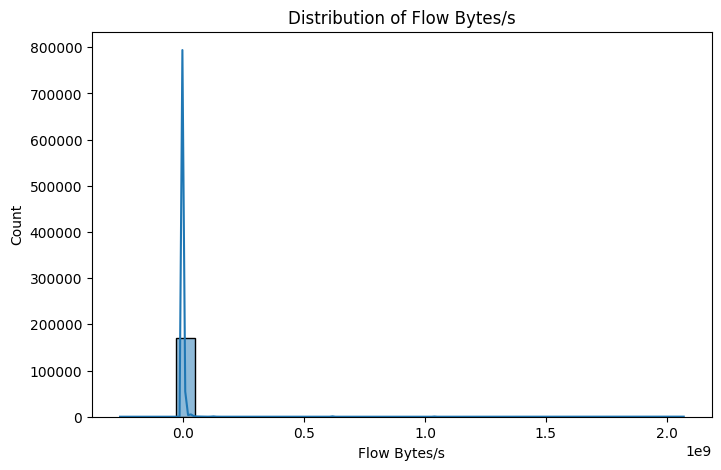

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


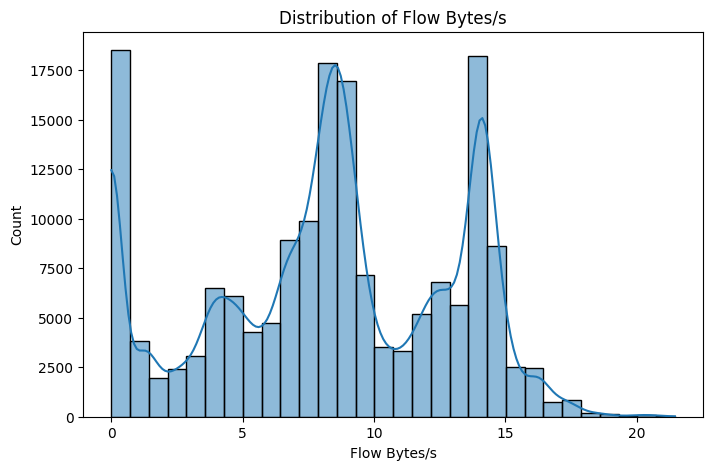

In [ ]:
df_cleaned = df_cleaned.copy()  # Ensures we modify the actual DataFrame

# Replace inf values with NaN first
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with the 99th percentile of valid values
finite_max = df_cleaned['Flow Bytes/s'].quantile(0.99)
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(finite_max)

df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].median())

df_cleaned['Flow Bytes/s'] = np.log1p(df_cleaned['Flow Bytes/s'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    10
dtype: int64


In [ ]:


# Now check unique labels
print(df[' Label'].unique())

['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define labels
labels = ['BENIGN', 'Web Attack-Brute Force', 'Web Attack-XSS', 'Web Attack-Sql Injection']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
df_cleaned[' Label'] = label_encoder.fit_transform(df_cleaned[' Label'])

# Mapping of labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'BENIGN': np.int64(0), 'Web Attack � Brute Force': np.int64(1), 'Web Attack � Sql Injection': np.int64(2), 'Web Attack � XSS': np.int64(3)}


In [ ]:
print(df_cleaned[' Label'].unique())


[0 1 3 2]


In [ ]:
import numpy as np

# Check for infinite values
print(np.isinf(df_cleaned).sum())



 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
Total Length of Fwd Packets      0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
Flow Bytes/s                     0
 Flow Packets/s                135
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
 Fwd IAT Std                     0
 Fwd IAT Min                     0
 Bwd IAT Std                     0
Fwd PSH Flags                    0
 Bwd PSH Flags                   0
 Fwd URG Flags                   0
 Bwd URG Flags                   0
 Bwd Packets/s                   0
 Min Packet Length               0
 Packet Length Variance          0
FIN Flag Count                   0
 RST Flag Count                  0
 PSH Flag Count     

In [ ]:
df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)

print(np.isinf(df_cleaned).sum())  # Should now be 0 for all columns


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag 

<ipython-input-18-7b3a09c2f2de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


In [ ]:
print(df_cleaned.isna().sum())


 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
Total Length of Fwd Packets     0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
Flow Bytes/s                   10
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
 Fwd IAT Std                    0
 Fwd IAT Min                    0
 Bwd IAT Std                    0
Fwd PSH Flags                   0
 Bwd PSH Flags                  0
 Fwd URG Flags                  0
 Bwd URG Flags                  0
 Bwd Packets/s                  0
 Min Packet Length              0
 Packet Length Variance         0
FIN Flag Count                  0
 RST Flag Count                 0
 PSH Flag Count                 0
 ACK Flag Coun

In [ ]:
df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)
print(df_cleaned.isna().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag 

<ipython-input-20-f5cb0ca728df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=[' Label']))  # Exclude target column


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (scaled)
y = df_cleaned[' Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MLP

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer (adjust for binary/multi-class)
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9836 - loss: 0.0559 - val_accuracy: 0.9923 - val_loss: 0.0219
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.9928 - loss: 0.0178 - val_accuracy: 0.9927 - val_loss: 0.0193
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9928 - loss: 0.0177 - val_accuracy: 0.9926 - val_loss: 0.0188
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.9925 - loss: 0.0178 - val_accuracy: 0.9925 - val_loss: 0.0181
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9931 - loss: 0.0170 - val_accuracy: 0.9928 - val_loss: 0.0182
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9932 - loss: 0.0169 - val_accuracy: 0.9928 - val_loss: 0.0184
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9934 - loss: 0.0169 - val_accuracy: 0.9928 - val_loss: 0.0176
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.9936 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.992722
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.58      0.94      0.72       316
           2       0.00      0.00      0.00         5
           3       0.83      0.03      0.07       143

    accuracy                           0.99     34074
   macro avg       0.60      0.49      0.45     34074
weighted avg       0.99      0.99      0.99     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1D CNN

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for Conv1D (CNN requires a 3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4260/4260 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.9876 - loss: 0.0442 - val_accuracy: 0.9916 - val_loss: 0.0218
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.9922 - loss: 0.0189 - val_accuracy: 0.9874 - val_loss: 0.0231
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - accuracy: 0.9933 - loss: 0.0162 - val_accuracy: 0.9927 - val_loss: 0.0185
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.9931 - loss: 0.0166 - val_accuracy: 0.9928 - val_loss: 0.0178
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.9936 - loss: 0.0155 - val_accuracy: 0.9930 - val_loss: 0.0176
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.9935 - loss: 0.0159 - val_accuracy: 0.9928 - val_loss: 0.0182
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.9934 - loss: 0.0159 - val_accuracy: 0.9928 - val_loss: 0.0181
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - accuracy: 0.9934 - loss: 0.01

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Predict on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Accuracy: 0.992957
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.58      0.98      0.73       316
           2       0.00      0.00      0.00         5
           3       1.00      0.03      0.05       143

    accuracy                           0.99     34074
   macro avg       0.65      0.50      0.45     34074
weighted avg       1.00      0.99      0.99     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for LSTM (LSTM requires 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.9885 - loss: 0.0833 - val_accuracy: 0.9919 - val_loss: 0.0197
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.9923 - loss: 0.0187 - val_accuracy: 0.9925 - val_loss: 0.0188
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9932 - loss: 0.0161 - val_accuracy: 0.9919 - val_loss: 0.0187
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9933 - loss: 0.0159 - val_accuracy: 0.9925 - val_loss: 0.0193
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.9933 - loss: 0.0164 - val_accuracy: 0.9929 - val_loss: 0.0176
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9934 - loss: 0.0155 - val_accuracy: 0.9928 - val_loss: 0.0180
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.9931 - loss: 0.0166 - val_accuracy: 0.9930 - val_loss: 0.0179
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.9935 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Test Accuracy: 0.993045
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.59      0.98      0.74       316
           2       0.00      0.00      0.00         5
           3       1.00      0.03      0.05       143

    accuracy                           0.99     34074
   macro avg       0.65      0.50      0.45     34074
weighted avg       1.00      0.99      0.99     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN+LSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+LSTM (CNN needs 3D input)
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_lstm_model.predict(X_test_cnn_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 104s 23ms/step - accuracy: 0.9862 - loss: 0.0756 - val_accuracy: 0.9901 - val_loss: 0.0287
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 139s 23ms/step - accuracy: 0.9909 - loss: 0.0262 - val_accuracy: 0.9888 - val_loss: 0.0247
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 144s 23ms/step - accuracy: 0.9918 - loss: 0.0204 - val_accuracy: 0.9920 - val_loss: 0.0224
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 140s 23ms/step - accuracy: 0.9930 - loss: 0.0184 - val_accuracy: 0.9929 - val_loss: 0.0193
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 99s 23ms/step - accuracy: 0.9930 - loss: 0.0172 - val_accuracy: 0.9928 - val_loss: 0.0186
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 140s 23ms/step - accuracy: 0.9935 - loss: 0.0158 - val_accuracy: 0.9927 - val_loss: 0.0179
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 144s 23ms/step - accuracy: 0.9928 - loss: 0.0173 - val_accuracy: 0.9927 - val_loss: 0.0179
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 96s 23ms/step - accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Predict on test set
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
y_pred_cnn_lstm = y_pred_cnn_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_lstm = accuracy_score(y_test, y_pred_cnn_lstm)
print(f"Test Accuracy: {accuracy_cnn_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_lstm))


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step
Test Accuracy: 0.992692
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.58      0.98      0.72       316
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       143

    accuracy                           0.99     34074
   macro avg       0.39      0.49      0.43     34074
weighted avg       0.99      0.99      0.99     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GRU

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for GRU (GRU requires 3D input)
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.9847 - loss: 0.0740 - val_accuracy: 0.9920 - val_loss: 0.0200
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.9923 - loss: 0.0187 - val_accuracy: 0.9924 - val_loss: 0.0197
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.9930 - loss: 0.0171 - val_accuracy: 0.9927 - val_loss: 0.0191
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.9932 - loss: 0.0164 - val_accuracy: 0.9926 - val_loss: 0.0188
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9929 - loss: 0.0164 - val_accuracy: 0.9928 - val_loss: 0.0185
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.9931 - loss: 0.0169 - val_accuracy: 0.9927 - val_loss: 0.0181
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9935 - loss: 0.0155 - val_accuracy: 0.9926 - val_loss: 0.0189
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9938 - loss: 0

In [ ]:
# Predict on test set
y_pred_gru = gru_model.predict(X_test_gru)
y_pred_gru = y_pred_gru.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Test Accuracy: {accuracy_gru:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

1065/1065 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Accuracy: 0.992898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.59      0.98      0.73       316
           2       0.22      0.40      0.29         5
           3       1.00      0.03      0.05       143

    accuracy                           0.99     34074
   macro avg       0.70      0.60      0.52     34074
weighted avg       1.00      0.99      0.99     34074



BiLSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for BiLSTM (3D input required)
X_train_bilstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_bilstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[1])),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 68s 14ms/step - accuracy: 0.9853 - loss: 0.0794 - val_accuracy: 0.9923 - val_loss: 0.0202
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 59s 14ms/step - accuracy: 0.9923 - loss: 0.0182 - val_accuracy: 0.9920 - val_loss: 0.0191
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 60s 14ms/step - accuracy: 0.9927 - loss: 0.0174 - val_accuracy: 0.9928 - val_loss: 0.0182
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9930 - loss: 0.0174 - val_accuracy: 0.9923 - val_loss: 0.0185
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - accuracy: 0.9935 - loss: 0.0155 - val_accuracy: 0.9930 - val_loss: 0.0181
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.9930 - loss: 0.0162 - val_accuracy: 0.9922 - val_loss: 0.0191
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 60s 14ms/step - accuracy: 0.9931 - loss: 0.0162 - val_accuracy: 0.9930 - val_loss: 0.0174
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9936 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Predict on test set
y_pred_bilstm = bilstm_model.predict(X_test_bilstm)
y_pred_bilstm = y_pred_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Test Accuracy: {accuracy_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Accuracy: 0.993045
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.59      0.98      0.74       316
           2       0.00      0.00      0.00         5
           3       1.00      0.03      0.05       143

    accuracy                           0.99     34074
   macro avg       0.65      0.50      0.45     34074
weighted avg       1.00      0.99      0.99     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN+BiLSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+BiLSTM (CNN requires a specific shape)
X_train_cnn_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+BiLSTM model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),  # Apply LSTM directly here without flattening
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_cnn_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_bilstm_model.predict(X_test_cnn_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 113s 25ms/step - accuracy: 0.9877 - loss: 0.0544 - val_accuracy: 0.9866 - val_loss: 0.0282
Epoch 2/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 106s 25ms/step - accuracy: 0.9916 - loss: 0.0224 - val_accuracy: 0.9920 - val_loss: 0.0204
Epoch 3/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 110s 26ms/step - accuracy: 0.9928 - loss: 0.0185 - val_accuracy: 0.9922 - val_loss: 0.0215
Epoch 4/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 110s 26ms/step - accuracy: 0.9930 - loss: 0.0177 - val_accuracy: 0.9926 - val_loss: 0.0186
Epoch 5/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 108s 25ms/step - accuracy: 0.9930 - loss: 0.0174 - val_accuracy: 0.9928 - val_loss: 0.0193
Epoch 6/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 143s 26ms/step - accuracy: 0.9934 - loss: 0.0167 - val_accuracy: 0.9914 - val_loss: 0.0206
Epoch 7/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 139s 25ms/step - accuracy: 0.9935 - loss: 0.0165 - val_accuracy: 0.9927 - val_loss: 0.0180
Epoch 8/20
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 140s 25ms/step - accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Predict on test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm)
y_pred_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_bilstm = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f"Test Accuracy: {accuracy_cnn_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_bilstm))


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step
Test Accuracy: 0.993338
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33610
           1       0.60      0.97      0.74       316
           2       0.00      0.00      0.00         5
           3       0.80      0.03      0.05       143

    accuracy                           0.99     34074
   macro avg       0.60      0.50      0.45     34074
weighted avg       0.99      0.99      0.99     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DBN

In [ ]:
import time
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Define the DBN with RBM layers and a logistic regression classifier
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=5, random_state=42)
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)  # Use all CPU cores

# Create the pipeline
dbn_model = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('classifier', classifier)])

# Start training time
start_time = time.time()

# Train the DBN model
dbn_model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = dbn_model.predict(X_test)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance on Test Set:
Training Time: 46.15 seconds
Precision: 0.972951
Recall: 0.986383
F1-Score: 0.979621

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     33610
           1       0.00      0.00      0.00       316
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       143

    accuracy                           0.99     34074
   macro avg       0.25      0.25      0.25     34074
weighted avg       0.97      0.99      0.98     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_dbn = dbn_model.predict(X_test)

# Accuracy
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
print(f"Test Accuracy: {accuracy_dbn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dbn))


Test Accuracy: 0.986383
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     33610
           1       0.00      0.00      0.00       316
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       143

    accuracy                           0.99     34074
   macro avg       0.25      0.25      0.25     34074
weighted avg       0.97      0.99      0.98     34074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
